### Installation

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("pqsfinder")
BiocManager::install("Gviz")
BiocManager::install("BSgenome")
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")

: 

###  Documntation

In [7]:
browseVignettes("pqsfinder")

In [9]:
library(pqsfinder)

In [8]:
seq <- DNAString("TTTTGGGCGGGAGGAGTGGAGTTTTTAACCCCAAAAATTTGGGAGGGTGGGTGGGAGAA")
pqs <- pqsfinder(seq, min_score = 20)
pqs

  PQS views on a 59-letter DNAString subject
subject: TTTTGGGCGGGAGGAGTGGAGTTTTTAACCCCAAAAATTTGGGAGGGTGGGTGGGAGAA
quadruplexes:
    start width score strand nt nb nm
[1]     5    17    33      +  3  2  0 [GGGCGGGAGGAGTGGAG]
[2]    41    15    73      +  3  0  0 [GGGAGGGTGGGTGGG]

In [12]:
pqs <- pqsfinder(seq, deep = TRUE, min_score = 20)
density(pqs)

[1]   0   0   0   0  38  42  43  43  71  81  86  86  99 103 103 107 107 111 112
[20] 108 108 104 104 104 104 104 104 104 104 104 104 104 104 104 104 104 104 104
[39] 104 104 124 132 132 125 125 125 125 101 101 101 101  63  63  63  55  11  11
[58]   0   0

Loading required package: GenomicRanges

Loading required package: grid


Attaching package: 'grid'


The following object is masked from 'package:Biostrings':

    pattern




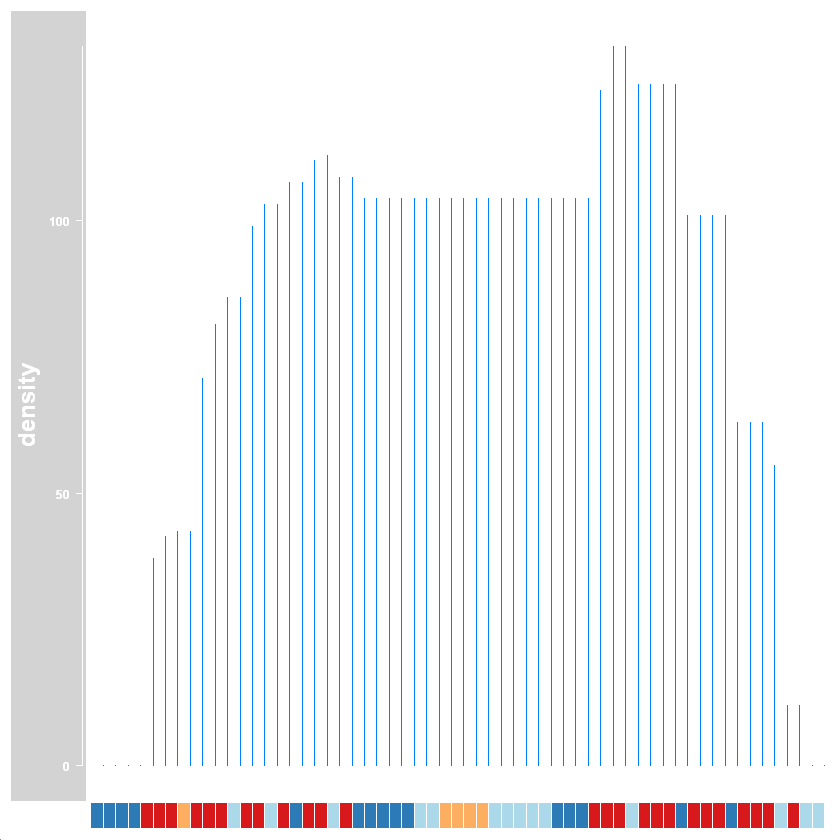

In [13]:
library(Gviz)
ss <- DNAStringSet(seq)
names(ss) <- "chr1"
dtrack <- DataTrack(
  start = 1:length(density(pqs)), width = 1, data = density(pqs),
  chromosome = "chr1", genome = "", name = "density")
strack <- SequenceTrack(ss, chromosome = "chr1", name = "sequence")
suppressWarnings(plotTracks(c(dtrack, strack), type = "h"))

In [17]:
library(pqsfinder)
library(BSgenome.Hsapiens.UCSC.hg38)
library(rtracklayer)
library(ggplot2)
library(Gviz)

Loading required package: BSgenome

Loading required package: rtracklayer



In [18]:
gnm <- "hg38"
gene <- "AHNAK"
# Load cached AHNAK region track:
load(system.file("extdata", "gtrack_ahnak.RData", package="pqsfinder"))
# Alternatively, query biomaRt API with the following commands:
# library(biomaRt)
# gtrack <- BiomartGeneRegionTrack(genome = gnm, symbol = gene, name = gene)

In [19]:
extend <- 1000
seq_start <- min(start(gtrack)) - extend
seq_end <- max(end(gtrack)) + extend
chr <- chromosome(gtrack)
seq <- Hsapiens[[chr]][seq_start:seq_end]

In [20]:
pqs <- pqsfinder(seq, deep = TRUE)

In [21]:
pqs

  PQS views on a 124694-letter DNAString subject
subject: GCGGGTGTCTGTAATCCCAGCTACTTGGGAGGCT...CAATGCACCAGCTGCACCTAGCATTTTCAGATCC
quadruplexes:
       start width score strand nt nb nm
  [1]    778    29    85      +  4  1  0 [GGGGAGGGGGAGCAAGGGGTGTAAGAGGG]
  [2]   1071    39    71      -  5  2  1 [CCCCCTCTAGTCCCAAA...GCCCACACTCTGTCCCC]
  [3]   1846    29    54      -  3  0  0 [CCCTTCACCTTCCCTCCCTGTCGTCTCCC]
  [4]   1912    32    60      -  4  2  0 [CCTCCTCCCCGAGTCACACCCAACTCATCCCC]
  [5]   2958    34    50      -  4  3  0 [CCCCCGGGGTTCCCGCCATTCTCCTGCCTCAGCC]
  [6]   4531    42    58      -  4  2  0 [CCCCAAAACGTTCCCTC...TCCCAATCCATATCCCC]
  [7]   5111    21    64      -  3  0  0 [CCCAGCCCAAATCCCTTACCC]
  [8]   7613    33    52      +  4  3  0 [GGGCCCTGAGGGAAAAGTGAGGGGGTGGCCGGG]
  [9]   7877    20    52      -  3  1  0 [CCCTCCCAGCCACGAGCCCC]
  ...    ...   ...   ...    ... ... ... ...
[184] 123115    33    51      -  4  1  1 [CCCCTCCCTTCAACATTCTAGGCTTCCCCCACC]
[185] 123174    27    56  

In [22]:
pqs_s <- pqs[order(score(pqs), decreasing = TRUE)]
pqs_s

  PQS views on a 124694-letter DNAString subject
subject: GCGGGTGTCTGTAATCCCAGCTACTTGGGAGGCT...CAATGCACCAGCTGCACCTAGCATTTTCAGATCC
quadruplexes:
       start width score strand nt nb nm
  [1] 114398    42   125      +  6  3  0 [GGGACCCGGGAGTGGGC...AGGGGGGCCGCTGGGGG]
  [2] 103330    36   118      -  6  2  1 [CCCTGCCCTTCCCTCCAACACCCCCACCGACCCCCC]
  [3]  73196    37   115      -  5  1  0 [CCCCCGACACACCTCCCCCTACTCTCCACCCGCCCCC]
  [4] 113317    47   113      +  6  3  0 [GGGAGTTGGGCGGGGGG...CGGAGGGGAAGGGGCGG]
  [5] 109892    24   106      -  4  0  0 [CCCCTCCCCATCACCCCCTTCCCC]
  [6] 114459    36   104      -  5  2  0 [CCCCCTCCCCGCATCCACTGCCCCCTGTCCTGTCCC]
  [7]  72215    27   101      -  4  0  0 [CCCCTGCCCCACCCCCTACCCTGCCCC]
  [8] 111482    29    99      -  4  0  0 [CCCCAGAGCCCCACACACCCCTCCGCCCC]
  [9]  29660    28    94      -  5  3  0 [CCCCCACCCCAACGCCCACCCTCCACCC]
  ...    ...   ...   ...    ... ... ... ...
[184] 114017    35    48      -  4  3  0 [CCCCAACAACGCGCCCTGCCGGAGCACCGCAACCC]
[185]

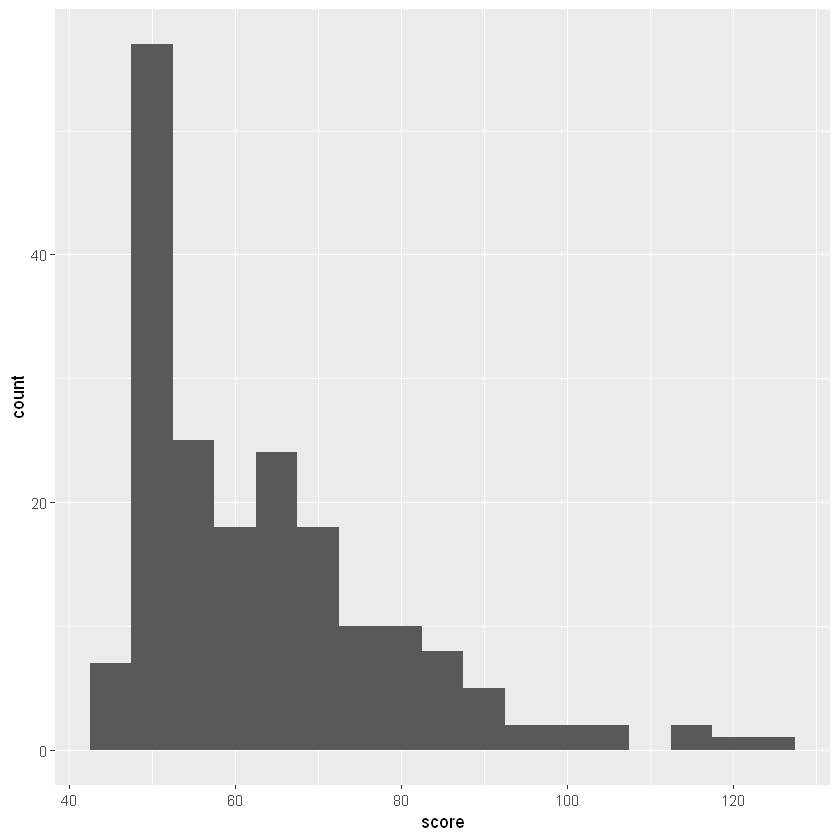

In [23]:
sf <- data.frame(score = score(pqs))
ggplot(sf) + geom_histogram(mapping = aes(x = score), binwidth = 5)

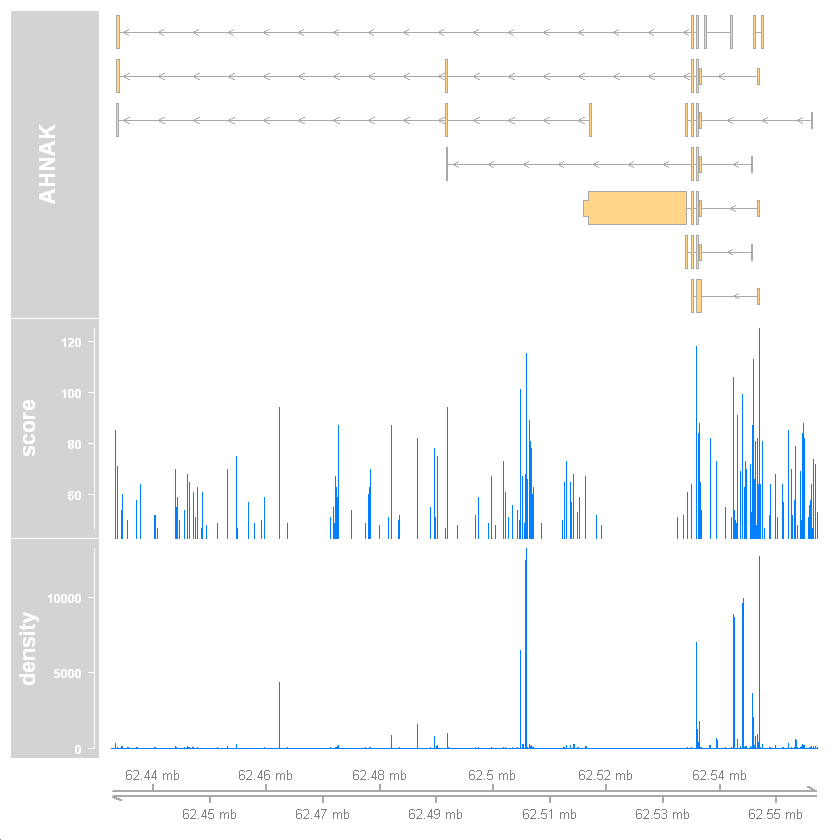

In [24]:
strack <- DataTrack(
  start = start(pqs)+seq_start, end = end(pqs)+seq_start,
  data = score(pqs), chromosome = chr, genome = gnm, name = "score")
dtrack <- DataTrack(
  start = (seq_start):(seq_start+length(density(pqs))-1), width = 1,
  data = density(pqs), chromosome = chr, genome = gnm,
  name = "density")
atrack <- GenomeAxisTrack()
suppressWarnings(plotTracks(c(gtrack, strack, dtrack, atrack), type = "h"))
